In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler

### Reading Data

In [2]:
df_train_fd001 = pd.read_csv('data/train_fd001_with_rul.csv')
df_test_fd001 = pd.read_csv('data/test_fd001_with_rul.csv')

In [3]:
index_names =  ['unit_number', 'time_cycles']
# setting_names = ['setting_1', 'setting_2', 'setting_3']
# drop_sensors = ['sensor_1','sensor_5','sensor_6','sensor_10','sensor_16','sensor_18','sensor_19']
target = ["rul"]
drop_labels = index_names + target

In [4]:
x_train = df_train_fd001.drop(drop_labels, axis = 1)
y_train = df_train_fd001["rul"]

y_train = y_train.clip(upper = 125)

In [5]:
test = df_test_fd001.groupby('unit_number').last().reset_index()
x_test = test.drop(drop_labels, axis = 1)
y_test = test["rul"]

y_test = y_test.clip(upper = 125)

In [6]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
df_x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
df_x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

### Experiment Set 1: Comparing machine learning algorithms

• Goal: Identify the most suitable machine learning algorithm. <br> 
• Explore at least 3 supervised machine learning algorithms with parameter tuning to obtain the best performing model for the data you have selected.

In [8]:
def evaluate(y_true, y_pred, label = ''):
    # MAE
    mae = mean_absolute_error(y_true, y_pred)
    # RMSE
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    # R Squared
    variance = r2_score(y_true, y_pred)
    print('{} set - MAE: {}, RMSE: {}, R2: {}'.format(label, mae, rmse, variance))

    return { 'label': label, 'mae': mae, 'rmse': rmse, 'r2': variance}

In [9]:
### Decision tree regression

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train_scaled, y_train)

y_pred_train = dt_regressor.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = dt_regressor.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 0.0, RMSE: 0.0, R2: 1.0
test set - MAE: 19.81, RMSE: 25.99826917315843, R2: 0.5790997700619758


{'label': 'test',
 'mae': 19.81,
 'rmse': 25.99826917315843,
 'r2': 0.5790997700619758}

In [10]:
### Linear regression

lm = LinearRegression()
lm.fit(x_train_scaled, y_train)

y_pred_train = lm.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = lm.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 17.55620783069864, RMSE: 21.468325520200416, R2: 0.7346046578123817
test set - MAE: 16.56873644302445, RMSE: 20.830452418998043, R2: 0.7297985369402261


{'label': 'test',
 'mae': 16.56873644302445,
 'rmse': 20.830452418998043,
 'r2': 0.7297985369402261}

In [11]:
### Lasso regression

lasso = Lasso()
lasso.fit(x_train_scaled, y_train)

y_pred_train = lasso.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = lasso.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 20.683910107419383, RMSE: 24.467312702040964, R2: 0.6552776054180337
test set - MAE: 20.550098420754153, RMSE: 24.071326877399574, R2: 0.6391802078075437


{'label': 'test',
 'mae': 20.550098420754153,
 'rmse': 24.071326877399574,
 'r2': 0.6391802078075437}

In [12]:
### Ridge regression

ridge = Ridge()
ridge.fit(x_train_scaled, y_train)

y_pred_train = ridge.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = ridge.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 17.556410899296328, RMSE: 21.4683732129695, R2: 0.7346034786377118
test set - MAE: 16.56478227313438, RMSE: 20.82460206085889, R2: 0.7299502910463482


{'label': 'test',
 'mae': 16.56478227313438,
 'rmse': 20.82460206085889,
 'r2': 0.7299502910463482}

In [13]:
### SVM regression

regressor = SVR(kernel = 'linear')
regressor.fit(x_train_scaled, y_train)

y_pred_train = regressor.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = regressor.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 17.52291774871658, RMSE: 21.55202918033055, R2: 0.7325311036271246
test set - MAE: 16.148181298376162, RMSE: 20.389718132213673, R2: 0.7411115141746607


{'label': 'test',
 'mae': 16.148181298376162,
 'rmse': 20.389718132213673,
 'r2': 0.7411115141746607}

In [14]:
### KNN regression

neigh = KNeighborsRegressor()
neigh.fit(x_train_scaled, y_train)

y_pred_train = neigh.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = neigh.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 11.71491444912995, RMSE: 16.684766401932727, R2: 0.839698637327521
test set - MAE: 14.468000000000002, RMSE: 20.170235496889966, R2: 0.7466550633847437


{'label': 'test',
 'mae': 14.468000000000002,
 'rmse': 20.170235496889966,
 'r2': 0.7466550633847437}

In [15]:
### Random forest regression

regr = RandomForestRegressor()
regr.fit(x_train_scaled, y_train)

y_pred_train = regr.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = regr.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 4.940583103097281, RMSE: 6.841757007957831, R2: 0.9730454401578147
test set - MAE: 11.873199999999999, RMSE: 16.93273982555688, R2: 0.8214562048238725


{'label': 'test',
 'mae': 11.873199999999999,
 'rmse': 16.93273982555688,
 'r2': 0.8214562048238725}

In [16]:
### Bayesian ridge regression

clf = BayesianRidge()
clf.fit(x_train_scaled, y_train)

y_pred_train = clf.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = clf.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 17.556325024506652, RMSE: 21.468346882919988, R2: 0.7346041296324743
test set - MAE: 16.56599158648626, RMSE: 20.82644714688442, R2: 0.7299024354363169


{'label': 'test',
 'mae': 16.56599158648626,
 'rmse': 20.82644714688442,
 'r2': 0.7299024354363169}

### Find Best Parameter For Selected Algorithms
Linear regression will be skipped for finding best parameters as there ar not parameters we can fine tuning.

In [17]:
### KNN Regressor

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 3]
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 3],
                         'weights': ['uniform', 'distance']})

In [18]:
best_params = grid_search.best_params_

print("Best parameters:", best_params)

Best parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [19]:
### Decision Tree Regressor

param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, None]
}

tree = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = tree, param_grid = param_grid, cv = 5)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [1.0, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [20]:
best_params = grid_search.best_params_

print("Best parameters:", best_params)

Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [21]:
### Bayesian ridge regression

param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
}

bayesian_ridge = BayesianRidge()

grid_search = GridSearchCV(estimator = bayesian_ridge, param_grid = param_grid, cv = 5)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid={'alpha_1': [1e-06, 1e-05, 0.0001],
                         'alpha_2': [1e-06, 1e-05, 0.0001],
                         'lambda_1': [1e-06, 1e-05, 0.0001],
                         'lambda_2': [1e-06, 1e-05, 0.0001]})

In [22]:
best_params = grid_search.best_params_

print("Best parameters:", best_params)

Best parameters: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 1e-06}


In [23]:
neigh = KNeighborsRegressor(n_neighbors = 7, p = 1, weights = 'uniform')
# scores = cross_validate(neigh, x_train_scaled, y_train,  scoring = ('r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'), cv = 5)
# mae = np.mean(-scores['test_neg_mean_absolute_error'])
# rmse = np.mean(-scores['test_neg_root_mean_squared_error'])
# r2 = np.mean(scores['test_r2'])

# print('train set - MAE: {}, RMSE: {}, R2: {}'.format(mae, rmse, r2))

neigh.fit(x_train_scaled, y_train)

y_pred_train = neigh.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = neigh.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 12.136687509088265, RMSE: 16.97431679289148, R2: 0.8340865632994863
test set - MAE: 13.595714285714287, RMSE: 18.369823302450822, R2: 0.7898641026340808


{'label': 'test',
 'mae': 13.595714285714287,
 'rmse': 18.369823302450822,
 'r2': 0.7898641026340808}

In [24]:
dt_regressor = DecisionTreeRegressor(max_depth = 10, max_features = None, min_samples_leaf = 4, min_samples_split = 10)
# scores = cross_validate(dt_regressor, x_train_scaled, y_train,  scoring = ('r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'), cv = 5)
# mae = np.mean(-scores['test_neg_mean_absolute_error'])
# rmse = np.mean(-scores['test_neg_root_mean_squared_error'])
# r2 = np.mean(scores['test_r2'])

# print('train set - MAE: {}, RMSE: {}, R2: {}'.format(mae, rmse, r2))

dt_regressor.fit(x_train_scaled, y_train)

y_pred_train = dt_regressor.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = dt_regressor.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 11.79795306648188, RMSE: 16.779325930854867, R2: 0.8378764991701514
test set - MAE: 14.472401108423746, RMSE: 19.39517427688668, R2: 0.7657510440738063


{'label': 'test',
 'mae': 14.472401108423746,
 'rmse': 19.39517427688668,
 'r2': 0.7657510440738063}

In [25]:
clf = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 0.0001, lambda_1 = 0.0001, lambda_2 = 1e-06)
clf.fit(x_train_scaled, y_train)

y_pred_train = clf.predict(x_train_scaled)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = clf.predict(x_test_scaled)
evaluate(y_test, y_pred_test, 'test')

train set - MAE: 17.556325026265185, RMSE: 21.468346883397693, R2: 0.7346041296206633
test set - MAE: 16.56599155802789, RMSE: 20.826447104130434, R2: 0.7299024365452673


{'label': 'test',
 'mae': 16.56599155802789,
 'rmse': 20.826447104130434,
 'r2': 0.7299024365452673}

### Experiment Set 2: Selecting features

• Goal: Find the best set of features. <br>
• Explore at least 3 feature selection methods to identify the most relevant features for the problem.

#### Correlation Coefficient : Winner

In [26]:
names = x_train.columns 
x_train_scaled_pd = pd.DataFrame(x_train_scaled, columns = names)

# Place the x_train and y_train data frames side by side
x_train_scaled_pd_con = pd.concat([x_train_scaled_pd, y_train], axis = 1)

# Generate correlation matrix
x_train_scaled_cor = x_train_scaled_pd_con.corr()

In [27]:
# Print correlation matrix
x_train_scaled_cor

,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,rul
setting_1,1.000000,0.011660,NaN,NaN,0.009030,-0.005651,0.009544,NaN,-0.001340,-0.009437,...,0.002318,-0.004469,0.007652,NaN,0.002599,NaN,NaN,-0.005713,-0.014559,-0.005556
setting_2,0.011660,1.000000,NaN,NaN,0.007266,0.009068,0.014673,NaN,0.014355,-0.016678,...,0.018156,-0.006310,0.014156,NaN,0.012280,NaN,NaN,-0.010554,-0.007846,-0.007091
setting_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_2,0.009030,0.007266,NaN,NaN,1.000000,0.602610,0.714949,NaN,0.132242,-0.702136,...,0.661792,0.179752,0.675975,NaN,0.629886,NaN,NaN,-0.661841,-0.668050,-0.678458
sensor_3,-0.005651,0.009068,NaN,NaN,0.602610,1.000000,0.678413,NaN,0.116039,-0.664595,...,0.600963,0.237137,0.639921,NaN,0.600017,NaN,NaN,-0.625941,-0.633901,-0.655030
sensor_4,0.009544,0.014673,NaN,NaN,0.714949,0.678413,1.000000,NaN,0.150480,-0.793130,...,0.745158,0.190748,0.758459,NaN,0.703499,NaN,NaN,-0.748067,-0.745193,-0.757157
sensor_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_6,-0.001340,0.014355,NaN,NaN,0.132242,0.116039,0.150480,NaN,1.000000,-0.155720,...,0.158276,-0.002112,0.149042,NaN,0.130810,NaN,NaN,-0.141419,-0.137419,-0.108289
sensor_7,-0.009437,-0.016678,NaN,NaN,-0.702136,-0.664595,-0.793130,NaN,-0.155720,1.000000,...,-0.764611,-0.110053,-0.747051,NaN,-0.692893,NaN,NaN,0.736163,0.737447,0.733021


<AxesSubplot:>

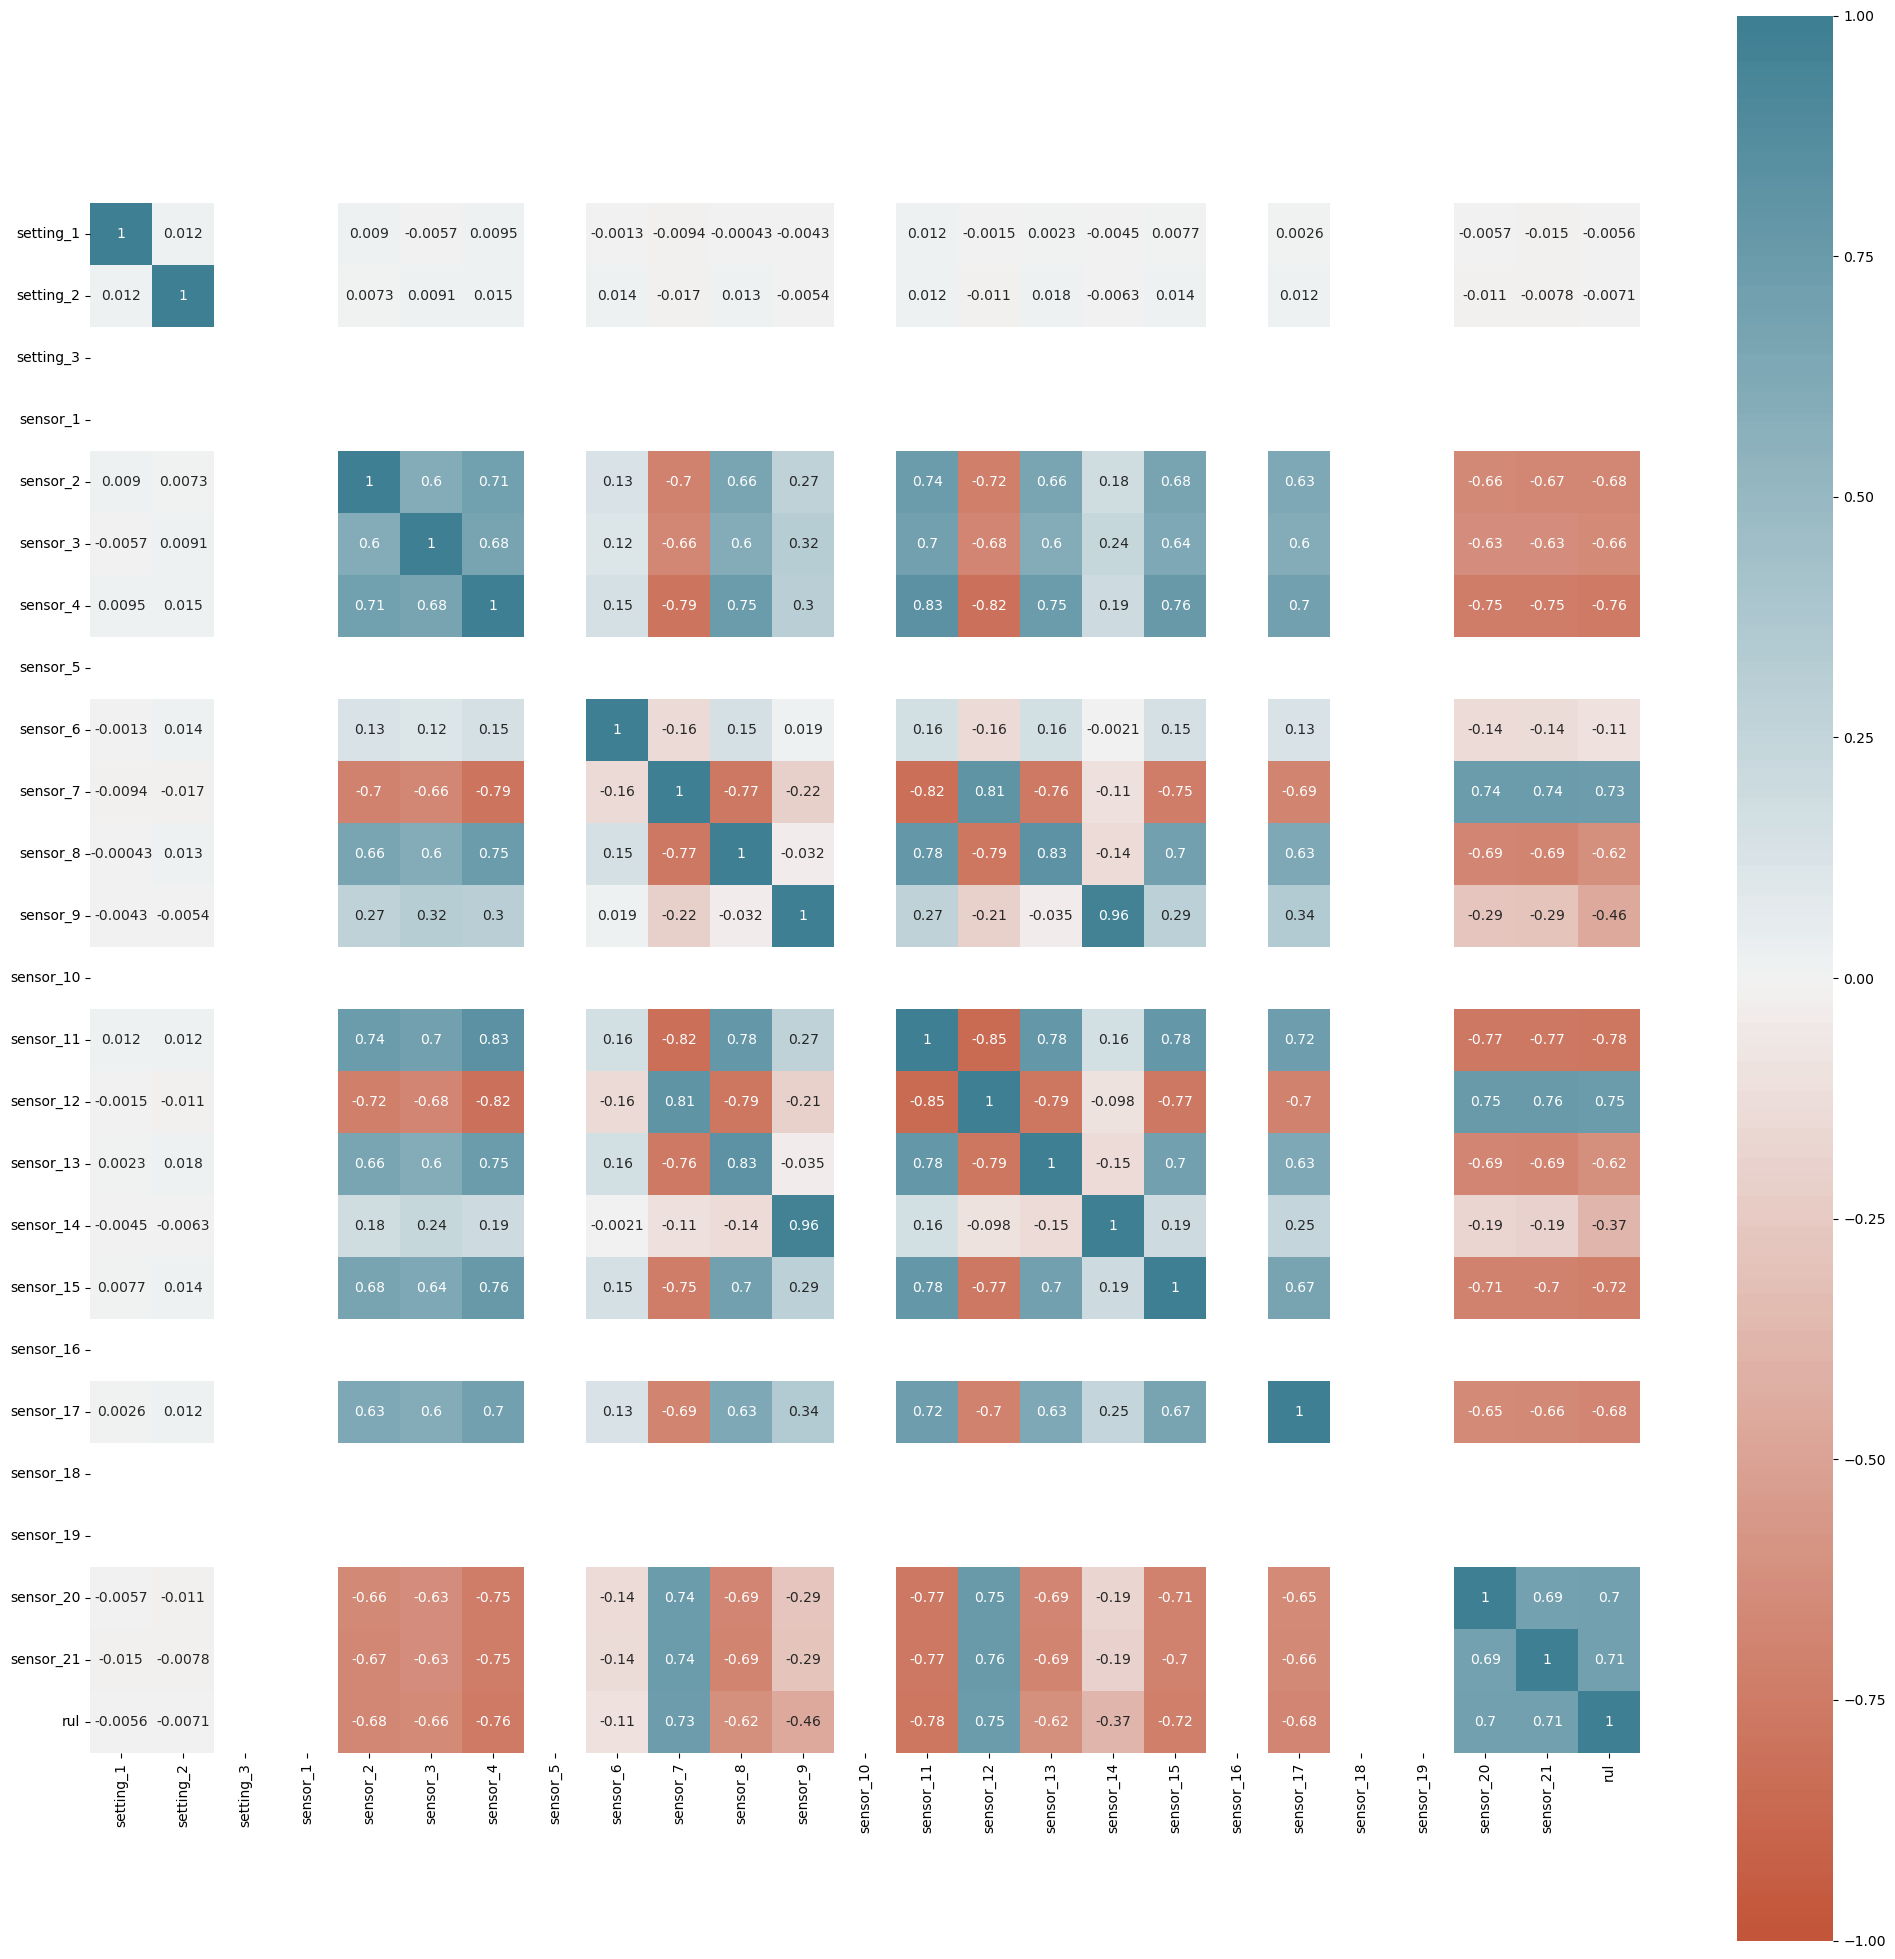

In [28]:
# Set plot size
plt.figure(figsize=(25,25))

# Generate the heatmap
sns.heatmap(
    x_train_scaled_cor,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True,
    annot = True
)

In [29]:
# Select features above a correlation threshold to target

# Correlation with target
# Apply abs() to get the absolute value so no need to deal with negative correlations
x_train_scaled_cor_target = abs(x_train_scaled_cor['rul'])

# Selecting highly correlated features
# Say we set the correlation threshold to 0.2
#relevant_features = cor_target[cor_target > 0.7]
#relevant_features

In [30]:
x_train_scaled_correlated_features = x_train_scaled_cor_target[x_train_scaled_cor_target > 0] # Change to 0.1, 0.2, 0.5, 0.7
x_train_scaled_correlated_features

setting_1    0.005556
setting_2    0.007091
sensor_2     0.678458
sensor_3     0.655030
sensor_4     0.757157
sensor_6     0.108289
sensor_7     0.733021
sensor_8     0.624568
sensor_9     0.462151
sensor_11    0.775230
sensor_12    0.748870
sensor_13    0.624034
sensor_14    0.369753
sensor_15    0.720858
sensor_17    0.680829
sensor_20    0.704626
sensor_21    0.707334
rul          1.000000
Name: rul, dtype: float64

In [31]:
x_train_correlated_features_1 = [column for column in x_train_scaled_pd.columns if abs(x_train_scaled_cor_target[column]> 0)] 
x_train_correlated_features_2 = [column for column in x_train_scaled_pd.columns if abs(x_train_scaled_cor_target[column]> 0.1)] 
x_train_correlated_features_3 = [column for column in x_train_scaled_pd.columns if abs(x_train_scaled_cor_target[column]> 0.2)] 
x_train_correlated_features_4 = [column for column in x_train_scaled_pd.columns if abs(x_train_scaled_cor_target[column]> 0.5)] 
x_train_correlated_features_5 = [column for column in x_train_scaled_pd.columns if abs(x_train_scaled_cor_target[column]> 0.7)] 

# Change to 0.1, 0.2, 0.5, 0.7

In [32]:
x_train_correlated_features_1

['setting_1',
 'setting_2',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_17',
 'sensor_20',
 'sensor_21']

In [33]:
### x_train_correlated_features_2 yields the highest performance.
### train set - MAE: 11.39000533178227, RMSE: 16.333464836910608, R2: 0.8463779356669445
### test set - MAE: 12.606000000000002, RMSE: 17.615754312546485, R2: 0.8067618903801216
x_train_correlated_features_list = [x_train_correlated_features_1, x_train_correlated_features_2, 
    x_train_correlated_features_3, x_train_correlated_features_4, x_train_correlated_features_5]
neigh = KNeighborsRegressor(n_neighbors = 7, p = 1, weights = 'uniform')

for selected_features in x_train_correlated_features_list:
    print("\nFeatures: ", selected_features)
    x_train_filtered = df_x_train_scaled.loc[:, selected_features]
    df_x_test_scaled_filtered = df_x_test_scaled.loc[:, selected_features]
    
    ### KNN regression
    neigh.fit(x_train_filtered, y_train)

    y_pred_train = neigh.predict(x_train_filtered)
    evaluate(y_train, y_pred_train, 'train')

    y_pred_test = neigh.predict(df_x_test_scaled_filtered)#using scaled_x_test
    #y_pred_test = neigh.predict(x_test)#using x_test
    evaluateValue = evaluate(y_test, y_pred_test, 'test')


Features:  ['setting_1', 'setting_2', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']
train set - MAE: 12.136687509088265, RMSE: 16.97431679289148, R2: 0.8340865632994863
test set - MAE: 13.595714285714287, RMSE: 18.369823302450822, R2: 0.7898641026340808

Features:  ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']
train set - MAE: 11.913943649293365, RMSE: 16.86228982911834, R2: 0.8362693249800367
test set - MAE: 13.227142857142859, RMSE: 18.531831412739653, R2: 0.7861412753479324

Features:  ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']
train set - MAE: 11.894728459945851, RMSE: 

#### Variance Threshold 

In [34]:
# Compute the variance of each column
x_train_scaled_pd.var()

setting_1    0.015802
setting_2    0.059643
setting_3    0.000000
sensor_1     0.000000
sensor_2     0.022686
sensor_3     0.017866
sensor_4     0.023084
sensor_5     0.000000
sensor_6     0.019293
sensor_7     0.020314
sensor_8     0.011568
sensor_9     0.009819
sensor_10    0.000000
sensor_11    0.025275
sensor_12    0.024731
sensor_13    0.011186
sensor_14    0.009691
sensor_15    0.020824
sensor_16    0.000000
sensor_17    0.016657
sensor_18    0.000000
sensor_19    0.000000
sensor_20    0.019632
sensor_21    0.022343
dtype: float64

In [35]:
### 0.01 variance threshold yield highest model performance.
### train set - MAE: 13.612456982211235, RMSE: 18.78759384068961, R2: 0.7967459169715116
### test set - MAE: 15.689999999999998, RMSE: 21.055422104531647, R2: 0.723930648076507

# Import VarianceThreshold module
from sklearn.feature_selection import VarianceThreshold
neigh = KNeighborsRegressor(n_neighbors = 7, p = 1, weights = 'uniform')

for x in [0.01, 0.02, 0.05]:
    # Create VarianceThreshold object with different variance thresholds 
    thresholder = VarianceThreshold(threshold = x) # Change to 0.01, 0.02 and 0.05
    # Conduct variance thresholding - fit_transform() takes in an array
    features_high_variance = thresholder.fit_transform(x_train_scaled_pd)
    # Use the get_support() function to identify the feature(s) above the variance threshold
    selected_indices = thresholder.get_support(indices = True)
    selected_features = x_train_scaled_pd.columns[selected_indices]
    
    print("\nFeatures: ", selected_features)
    x_train_filtered = df_x_train_scaled.loc[:, selected_features]
    df_x_test_scaled_filtered = df_x_test_scaled.loc[:, selected_features]
    
    ### KNN regression
    neigh.fit(x_train_filtered, y_train)

    y_pred_train = neigh.predict(x_train_filtered)
    evaluate(y_train, y_pred_train, 'train')

    y_pred_test = neigh.predict(df_x_test_scaled_filtered)#using scaled_x_test
    #y_pred_test = neigh.predict(x_test)#using x_test
    evaluateValue = evaluate(y_test, y_pred_test, 'test')


Features:  Index(['setting_1', 'setting_2', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21'],
      dtype='object')
train set - MAE: 14.277017248661863, RMSE: 19.353532746507547, R2: 0.7843162348937347
test set - MAE: 15.235714285714284, RMSE: 20.610939239310046, R2: 0.735463345309292

Features:  Index(['setting_2', 'sensor_2', 'sensor_4', 'sensor_7', 'sensor_11',
       'sensor_12', 'sensor_15', 'sensor_21'],
      dtype='object')
train set - MAE: 14.901839811102572, RMSE: 20.141543920921514, R2: 0.7663948201638436
test set - MAE: 15.65714285714286, RMSE: 21.213184194586848, R2: 0.7197781363197964

Features:  Index(['setting_2'], dtype='object')
train set - MAE: 37.45892104115166, RMSE: 53.70584238376998, R2: -0.6608867437873349
test set - MAE: 47.472857142857144, RMSE: 61.28323504808786, R2: -1.338695376772482


#### Mutual Information

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Select top 5 features based on f_regression score
k = 23 # Change to different values like 1, 5, 10 and 15 
selector = SelectKBest(score_func=f_regression, k=k)
# Learn the relationship from training data
selector.fit_transform(x_train_scaled, y_train) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
selected_features = x_train_scaled_pd.columns[selected_indices]

In [37]:
selected_features

Index(['setting_1', 'setting_2', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21'],
      dtype='object')

In [38]:
# Show the scores of the selected features
selected_scores = selector.scores_[selected_indices]
feature_name_highscore=[]
# Sort the selected features and scores in descending order
sorted_indices = np.argsort(-selected_scores)
sorted_features = selected_features[sorted_indices]
sorted_scores = selected_scores[sorted_indices]

# Print the scores of the selected features
print("Scores of Selected Features (Descending Order):")
# for feature_name, score in zip(selected_features, selected_scores):
#     print("Feature: %s, Score: %f" % (feature_name, score))
    
for i in range(len(sorted_features)):
    feature_name = sorted_features[i]
    score = sorted_scores[i]
    
    if(score > 10000):
        feature_name_highscore.append(feature_name)
    print("Feature: %s, Score: %f" % (feature_name, score))

print("Feature with highscores: ", feature_name_highscore)

Scores of Selected Features (Descending Order):
Feature: sensor_11, Score: 31070.328368
Feature: sensor_4, Score: 27714.893659
Feature: sensor_12, Score: 26341.140302
Feature: sensor_7, Score: 23956.874707
Feature: sensor_15, Score: 22315.602210
Feature: sensor_21, Score: 20655.553949
Feature: sensor_20, Score: 20341.971636
Feature: sensor_17, Score: 17824.136428
Feature: sensor_2, Score: 17594.486606
Feature: sensor_3, Score: 15502.946945
Feature: sensor_8, Score: 13193.758040
Feature: sensor_13, Score: 13156.844657
Feature: sensor_9, Score: 5602.645998
Feature: sensor_14, Score: 3266.986488
Feature: sensor_6, Score: 244.775779
Feature: setting_2, Score: 1.037227
Feature: setting_1, Score: 0.636893
Feature: sensor_16, Score: 0.000000
Feature: sensor_1, Score: 0.000000
Feature: sensor_18, Score: 0.000000
Feature: sensor_19, Score: 0.000000
Feature: sensor_5, Score: 0.000000
Feature: sensor_10, Score: 0.000000
Feature with highscores:  ['sensor_11', 'sensor_4', 'sensor_12', 'sensor_7', 

In [39]:
### Selecting Features with score > 10000
### train set - MAE: 13.367059279724685, RMSE: 18.528960913017126, R2: 0.8023034532919944
### test set - MAE: 14.806000000000001, RMSE: 19.918624450498584, R2: 0.7529362789893936
neigh = KNeighborsRegressor(n_neighbors = 7, p = 1, weights = 'uniform')

x_train_filtered = df_x_train_scaled.loc[:, feature_name_highscore]
df_x_test_scaled_filtered = df_x_test_scaled.loc[:, feature_name_highscore]

print("\nFeatures: ", x_train_filtered.columns.tolist())
### KNN regression
neigh.fit(x_train_filtered, y_train)

y_pred_train = neigh.predict(x_train_filtered)
evaluate(y_train, y_pred_train, 'train')

y_pred_test = neigh.predict(df_x_test_scaled_filtered)#using scaled_x_test
#y_pred_test = neigh.predict(x_test)#using x_test
evaluateValue = evaluate(y_test, y_pred_test, 'test')


Features:  ['sensor_11', 'sensor_4', 'sensor_12', 'sensor_7', 'sensor_15', 'sensor_21', 'sensor_20', 'sensor_17', 'sensor_2', 'sensor_3', 'sensor_8', 'sensor_13']
train set - MAE: 14.131092599901674, RMSE: 19.23844669922587, R2: 0.7868737410153217
test set - MAE: 15.362857142857145, RMSE: 20.383656918908226, R2: 0.7412654098873318


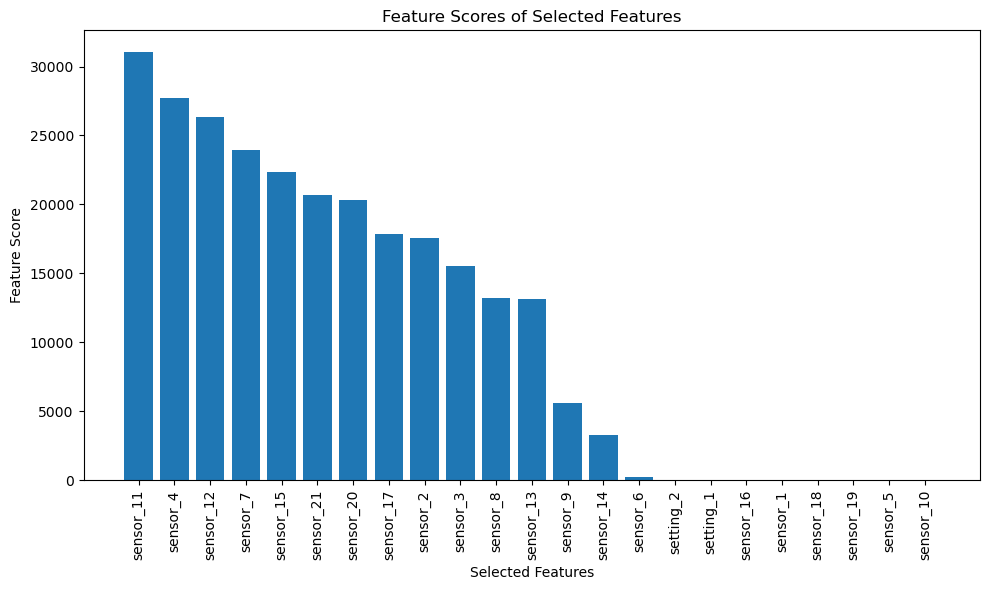

In [40]:
# Plot the feature scores as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores)
plt.xticks(range(len(sorted_scores)), sorted_features, rotation='vertical')
plt.xlabel("Selected Features")
plt.ylabel("Feature Score")
plt.title("Feature Scores of Selected Features")
plt.tight_layout()
plt.show()

### Experiment Set 3: Ensemble learning

• Goal: Examine if ensemble learning can help improve model performance. <br>
• Explore at least 3 ensemble learning methods to examine if model performance can be improved.

In [41]:
metric_df = pd.DataFrame(columns = ['ensemble type','model', 'train/ test', 'MAE', 'RMSE', 'R2'])

linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(max_depth = 10, max_features = None, min_samples_leaf = 4, min_samples_split = 10)
knn_reg = KNeighborsRegressor(n_neighbors = 7, p = 1, weights = 'distance')
br_reg = BayesianRidge()

### Bagging

Linear Regressor

In [42]:
bagging_reg = BaggingRegressor(estimator = linear_reg, n_estimators = 10, random_state = 42)
bagging_reg.fit(x_train_scaled, y_train)

y_pred_train = bagging_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['bagging', 'linear regressor', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = bagging_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['bagging', 'linear regressor', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 17.562470534187053, RMSE: 21.469586457353124, R2: 0.7345734810282857
test set - MAE: 16.571424022552705, RMSE: 20.832435972921644, R2: 0.7297470752936468


Decision Tree Regressor

In [43]:
bagging_reg = BaggingRegressor(estimator = tree_reg, n_estimators = 10, random_state = 42)
bagging_reg.fit(x_train_scaled, y_train)

y_pred_train = bagging_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['bagging', 'decision tree regressor', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = bagging_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['bagging', 'decision tree regressor', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 11.435702268253877, RMSE: 15.861465457681469, R2: 0.85512829463455
test set - MAE: 12.541042247829475, RMSE: 17.61517650147877, R2: 0.8067745669065163


In [44]:
bagging_reg = BaggingRegressor(estimator = knn_reg, n_estimators = 10, random_state = 42)
bagging_reg.fit(x_train_scaled, y_train)

y_pred_train = bagging_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['bagging', 'knn regressor', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = bagging_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['bagging', 'knn regressor', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 5.170746478500697, RMSE: 7.764651412186009, R2: 0.9652831047275834
test set - MAE: 13.851890032128512, RMSE: 18.731877058463326, R2: 0.7814992718058092


In [45]:
bagging_reg = BaggingRegressor(estimator = br_reg, n_estimators = 10, random_state = 42)
bagging_reg.fit(x_train_scaled, y_train)

y_pred_train = bagging_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['bagging', 'bayesian ridge', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = bagging_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['bagging', 'bayesian ridge', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 17.56268310697441, RMSE: 21.46971263700095, R2: 0.7345703611244002
test set - MAE: 16.569187686976576, RMSE: 20.829045143721473, R2: 0.7298350445480795


### Boosting

In [46]:
boosting_reg = AdaBoostRegressor(estimator = linear_reg, n_estimators = 10, random_state = 42)
boosting_reg.fit(x_train_scaled, y_train)

y_pred_train = boosting_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['boosting', 'linear regressor', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = boosting_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['boosting', 'linear regressor', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 17.63353327564782, RMSE: 21.503338283140252, R2: 0.7337382836229128
test set - MAE: 16.896787061848226, RMSE: 21.086276591929856, R2: 0.7231209545548627


In [47]:
boosting_reg = AdaBoostRegressor(estimator = tree_reg, n_estimators = 10, random_state = 42)
boosting_reg.fit(x_train_scaled, y_train)

y_pred_train = boosting_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['boosting', 'decision tree regressor', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = boosting_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['boosting', 'decision tree regressor', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 12.477362833006673, RMSE: 16.170369362451705, R2: 0.849430560672633
test set - MAE: 13.317677136581256, RMSE: 17.825588424403016, R2: 0.8021308715219588


In [48]:
boosting_reg = AdaBoostRegressor(estimator = knn_reg, n_estimators = 10, random_state = 42)
boosting_reg.fit(x_train_scaled, y_train)

y_pred_train = boosting_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['boosting', 'knn regressor', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = boosting_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['boosting', 'knn regressor', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 1.1011059326108315, RMSE: 2.7212694630990044, R2: 0.9957357756145416
test set - MAE: 16.2302559813445, RMSE: 22.07665552248048, R2: 0.6965012872741569


In [49]:
boosting_reg = AdaBoostRegressor(estimator = br_reg, n_estimators = 10, random_state = 42)
boosting_reg.fit(x_train_scaled, y_train)

y_pred_train = boosting_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['boosting', 'bayesian ridge', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = boosting_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['boosting', 'bayesian ridge', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 17.62605100585966, RMSE: 21.49857204946637, R2: 0.7338563048247568
test set - MAE: 16.903581310967088, RMSE: 21.098437600942365, R2: 0.7228014956396722


### Voting

In [50]:
vooting_reg = VotingRegressor(estimators = [('lr', linear_reg), ('dtr', tree_reg), ('knnr', knn_reg), ('brr', br_reg)])
vooting_reg.fit(x_train_scaled, y_train)

y_pred_train = vooting_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['vooting', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = vooting_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['vooting', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 11.233624703621619, RMSE: 14.100570421290813, R2: 0.8855092720568583
test set - MAE: 14.108728370578246, RMSE: 18.38136820053915, R2: 0.7895998910720892


### Stacking

In [51]:
stacking_reg = StackingRegressor(estimators = [('lr', linear_reg), ('dtr', tree_reg), ('knnr', knn_reg), ('brr', br_reg)], final_estimator = None)
stacking_reg.fit(x_train_scaled, y_train)

y_pred_train = stacking_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['stacking - no meta', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = stacking_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['stacking - no meta', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 6.879727135807473, RMSE: 9.058628855265649, R2: 0.9527478160825618
test set - MAE: 13.099129864483064, RMSE: 17.73766214981567, R2: 0.8040780708613858


In [52]:
stacking_reg = StackingRegressor(estimators = [('lr', linear_reg), ('dtr', tree_reg), ('knnr', knn_reg), ('brr', br_reg)], final_estimator = linear_reg)
stacking_reg.fit(x_train_scaled, y_train)

y_pred_train = stacking_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['stacking - linear regression', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = stacking_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['stacking - linear regression', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 6.867982255756549, RMSE: 9.041130485743277, R2: 0.9529301919358604
test set - MAE: 13.118247970145408, RMSE: 17.752703091672906, R2: 0.8037456595509327


In [53]:
stacking_reg = StackingRegressor(estimators = [('lr', linear_reg), ('dtr', tree_reg), ('knnr', knn_reg), ('brr', br_reg)], final_estimator = tree_reg)
stacking_reg.fit(x_train_scaled, y_train)

y_pred_train = stacking_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['stacking - decision tree regression', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = stacking_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['stacking - decision tree regression', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 10.721901810282509, RMSE: 15.469305992246369, R2: 0.8622033646721645
test set - MAE: 13.691454978623266, RMSE: 18.763251901120462, R2: 0.7807667059051256


In [54]:
stacking_reg = StackingRegressor(estimators = [('lr', linear_reg), ('dtr', tree_reg), ('knnr', knn_reg), ('brr', br_reg)], final_estimator = knn_reg)
stacking_reg.fit(x_train_scaled, y_train)

y_pred_train = stacking_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['stacking - knn regression', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = stacking_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['stacking - knn regression', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 11.107148148875718, RMSE: 16.00614718952463, R2: 0.852473321192039
test set - MAE: 13.704336048747429, RMSE: 18.308116044101663, R2: 0.7912734935576611


In [55]:
stacking_reg = StackingRegressor(estimators = [('lr', linear_reg), ('dtr', tree_reg), ('knnr', knn_reg), ('brr', br_reg)], final_estimator = br_reg)
stacking_reg.fit(x_train_scaled, y_train)

y_pred_train = stacking_reg.predict(x_train_scaled)
result = evaluate(y_train, y_pred_train, 'train')

metric_df.loc[len(metric_df)] = ['stacking - bayesian ridge', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

y_pred_test = stacking_reg.predict(x_test_scaled)
result = evaluate(y_test, y_pred_test, 'test')
metric_df.loc[len(metric_df)] = ['stacking - bayesian ridge', 'all', result['label'], result['mae'], result['rmse'], result['r2']]

train set - MAE: 6.913483548979727, RMSE: 9.10688260825713, R2: 0.9522430668353004
test set - MAE: 13.075894218774154, RMSE: 17.718136956838386, R2: 0.8045091657803136


In [56]:
metric_df

,ensemble type,model,train/ test,MAE,RMSE,R2
0,bagging,linear regressor,train,17.562471,21.469586,0.734573
1,bagging,linear regressor,test,16.571424,20.832436,0.729747
2,bagging,decision tree regressor,train,11.435702,15.861465,0.855128
3,bagging,decision tree regressor,test,12.541042,17.615177,0.806775
4,bagging,knn regressor,train,5.170746,7.764651,0.965283
5,bagging,knn regressor,test,13.851890,18.731877,0.781499
6,bagging,bayesian ridge,train,17.562683,21.469713,0.734570
7,bagging,bayesian ridge,test,16.569188,20.829045,0.729835
8,boosting,linear regressor,train,17.633533,21.503338,0.733738
9,boosting,linear regressor,test,16.896787,21.086277,0.723121


In [57]:
metric_df[metric_df['train/ test'] == 'test']['MAE'].min()

12.541042247829475

In [58]:
metric_df[metric_df['train/ test'] == 'test']['RMSE'].min()

17.61517650147877

In [59]:
metric_df[metric_df['train/ test'] == 'test']['R2'].max()

0.8067745669065163

In [60]:
metric_df[metric_df['MAE'] == 12.541042247829475]

,ensemble type,model,train/ test,MAE,RMSE,R2
3,bagging,decision tree regressor,test,12.541042,17.615177,0.806775


In [61]:
metric_df[metric_df['RMSE'] == 17.61517650147877]

,ensemble type,model,train/ test,MAE,RMSE,R2
3,bagging,decision tree regressor,test,12.541042,17.615177,0.806775


In [62]:
metric_df[metric_df['R2'] == 0.8067745669065163]

,ensemble type,model,train/ test,MAE,RMSE,R2
3,bagging,decision tree regressor,test,12.541042,17.615177,0.806775


### Experiment Set 4: Varying training sample size

• Goal: Examine if more training data will lead to a better performing model.<br>
• Select the 3 best performing models from the three other experiment sets. Use the same training set for each model. You will train each model with increments of 10% following the steps below.<br>
&emsp; i. Randomly subsample 10% of the training data and train each model (train-10P). Then, evaluate the performance of the models on the test set.<br>
&emsp; ii. Randomly subsample another 10% from the remaining 90% of the training data. Add this second 10% sample to the first 10% sample in (i). Train another round of the models with the sample containing 20% of the training data (train-20P). Then, evaluate the performance of the models on the test set.<br>
&emsp; iii. Repeat (i) and (ii) in 10% increments until you reach 100% of the training data. You will have a set of 10 results (10%, 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90% and 100%) for each model.

#### EXP 1 : KNN Regressor

In [63]:
column_names=['fraction','model','MAE(Train)','MAE(Test)','RMSE(Train)','RMSE(Test)','R2(Train)','R2(Test)']
df_final = pd.DataFrame({}, columns = column_names)

In [64]:
df_final

,fraction,model,MAE(Train),MAE(Test),RMSE(Train),RMSE(Test),R2(Train),R2(Test)


In [65]:
import random
neigh = KNeighborsRegressor(n_neighbors = 7, p = 1, weights = 'uniform')
#neigh = KNeighborsRegressor()

for fraction in [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
    sumTrainMAE, sumTrainRMSE, sumTrainVariance, sumTestMAE, sumTestRMSE, sumTestVariance = \
    [],[],[],[],[],[]
    seed = [random.randint(1, 500) for _ in range(5)]
    print('Fraction: ', fraction, 'Seed: ', seed)
    
    for x in range(5):  
        ###Setting fraction and seeds for each run
        sub_x_train = df_x_train_scaled.sample(frac = fraction, random_state = seed[x], replace=True)#using scaled x_train
        sub_y_train = y_train.sample(frac = fraction, random_state = seed[x], replace=True)

        ### KNN regression
        neigh.fit(sub_x_train, sub_y_train)
        
        y_pred_train = neigh.predict(sub_x_train)
        evaluateTrainValue = evaluate(sub_y_train, y_pred_train, 'train')   
        y_pred_test = neigh.predict(df_x_test_scaled)
        evaluateTestValue = evaluate(y_test, y_pred_test, 'test')
        
        ###Adding results from each run into list to be processed later
        sumTrainMAE.append(evaluateTrainValue['mae'])
        sumTrainRMSE.append(evaluateTrainValue['rmse'])
        sumTrainVariance.append(evaluateTrainValue['r2'])
        
        sumTestMAE.append(evaluateTestValue['mae'])
        sumTestRMSE.append(evaluateTestValue['rmse'])
        sumTestVariance.append(evaluateTestValue['r2'])
        
    print("Average Train MAE: ", np.mean(sumTrainMAE), "Average Train RMSE: ", np.mean(sumTrainRMSE), \
          "Average Train Variance: ", np.mean(sumTrainVariance))
    print("Average Test MAE: ", np.mean(sumTestMAE), "Average Test RMSE: ", np.mean(sumTestRMSE), \
          "Average Test Variance: ", np.mean(sumTestVariance))
    
    ###Finalizing and tabulate the results for each experiment
    df_final.loc[len(df_final)] = [fraction, 'KNN Regressor',  \
                                   round(np.mean(sumTrainMAE),2), round(np.mean(sumTestMAE),2), \
                                   round(np.mean(sumTrainRMSE),2), round(np.mean(sumTestRMSE),2), \
                                   round(np.mean(sumTrainVariance),2), round(np.mean(sumTestVariance),2)]
    print('\n')
    

Fraction:  0.1 Seed:  [267, 116, 251, 63, 318]
train set - MAE: 11.842185444221313, RMSE: 16.85190184236456, R2: 0.8402360969928768
test set - MAE: 14.778571428571427, RMSE: 20.77473445887419, R2: 0.7312420907473782
train set - MAE: 12.888442628626827, RMSE: 17.608860769608306, R2: 0.8279992856587974
test set - MAE: 14.41, RMSE: 20.325529337686213, R2: 0.7427389601837369
train set - MAE: 12.770514507305588, RMSE: 17.628105860713145, R2: 0.8192052414550376
test set - MAE: 14.761428571428567, RMSE: 20.631593565724014, R2: 0.7349328926195813
train set - MAE: 12.532442351637698, RMSE: 17.649346480338593, R2: 0.8227052725766049
test set - MAE: 15.497142857142858, RMSE: 21.13326037026826, R2: 0.7218857135613299
train set - MAE: 12.577037601274151, RMSE: 17.42671442403997, R2: 0.8204113701548736
test set - MAE: 13.83285714285714, RMSE: 19.283401977782205, R2: 0.7684431674240031
Average Train MAE:  12.522124506613114 Average Train RMSE:  17.432985875412918 Average Train Variance:  0.8261114533

train set - MAE: 10.894516813086943, RMSE: 15.730231309947863, R2: 0.8570273648398634
test set - MAE: 13.9, RMSE: 18.962325699089956, R2: 0.7760899975132647
train set - MAE: 11.090907517202579, RMSE: 16.012971097547823, R2: 0.8515235378434625
test set - MAE: 14.232857142857148, RMSE: 19.46052519374353, R2: 0.7641698080219403
train set - MAE: 11.06785822478037, RMSE: 16.036301431567775, R2: 0.8530366003061302
test set - MAE: 14.768571428571427, RMSE: 19.97316567143966, R2: 0.751581405726951
Average Train MAE:  10.9650582074696 Average Train RMSE:  15.90652478994853 Average Train Variance:  0.8545948019758616
Average Test MAE:  14.275428571428572 Average Test RMSE:  19.389605730493532 Average Test Variance:  0.7657045116087836


Fraction:  0.9 Seed:  [137, 11, 106, 156, 15]
train set - MAE: 10.831815104326951, RMSE: 15.838884069698944, R2: 0.856205790429008
test set - MAE: 14.460000000000004, RMSE: 18.820993489143113, R2: 0.77941530299457
train set - MAE: 10.761463654828583, RMSE: 15.688

#### EXP 2: Feature Selection

In [66]:
import random
neigh = KNeighborsRegressor(n_neighbors = 7, p = 1, weights = 'uniform')
#neigh = KNeighborsRegressor()
selected_features = x_train_correlated_features_2

print('Selected features: ', selected_features)
for fraction in [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
    sumTrainMAE, sumTrainRMSE, sumTrainVariance, sumTestMAE, sumTestRMSE, sumTestVariance = \
    [],[],[],[],[],[]
    seed = [random.randint(1, 500) for _ in range(5)]

    print('Fraction: ', fraction, 'Seed: ', seed)
    for x in range(5):
        ### Include only selected features in the evaluation
        x_train_filtered = df_x_train_scaled.loc[:, selected_features]
        df_x_test_scaled_filtered = df_x_test_scaled.loc[:, selected_features]
        ###Setting fraction and seeds for each run
        sub_x_train = x_train_filtered.sample(frac = fraction, random_state = seed[x], replace=True)
        sub_y_train = y_train.sample(frac = fraction, random_state = seed[x], replace=True)

        ### KNN regression
        neigh.fit(sub_x_train, sub_y_train)
        
        y_pred_train = neigh.predict(sub_x_train)
        evaluateTrainValue = evaluate(sub_y_train, y_pred_train, 'train')    
        y_pred_test = neigh.predict(df_x_test_scaled_filtered)
        evaluateTestValue = evaluate(y_test, y_pred_test, 'test')
        
        
        ###Adding results from each run into list to be processed later
        sumTrainMAE.append(evaluateTrainValue['mae'])
        sumTrainRMSE.append(evaluateTrainValue['rmse'])
        sumTrainVariance.append(evaluateTrainValue['r2'])
        
        sumTestMAE.append(evaluateTestValue['mae'])
        sumTestRMSE.append(evaluateTestValue['rmse'])
        sumTestVariance.append(evaluateTestValue['r2'])
        
    print("Average Train MAE: ", np.mean(sumTrainMAE), "Average Train RMSE: ", np.mean(sumTrainRMSE), \
          "Average Train Variance: ", np.mean(sumTrainVariance))
    print("Average Test MAE: ", np.mean(sumTestMAE), "Average Test RMSE: ", np.mean(sumTestRMSE), \
          "Average Test Variance: ", np.mean(sumTestVariance))
    
    ###Finalizing and tabulate the results for each experiment
    df_final.loc[len(df_final)] = [fraction, 'KNN Regressor(Feature Selection)',  \
                                   round(np.mean(sumTrainMAE),2), round(np.mean(sumTestMAE),2), \
                                   round(np.mean(sumTrainRMSE),2), round(np.mean(sumTestRMSE),2), \
                                   round(np.mean(sumTrainVariance),2), round(np.mean(sumTestVariance),2)]
    
    print('\n')
    

Selected features:  ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']
Fraction:  0.1 Seed:  [500, 299, 97, 120, 327]
train set - MAE: 12.137940585832006, RMSE: 16.940783252510585, R2: 0.8266568133618928
test set - MAE: 14.594285714285716, RMSE: 19.098968879101772, R2: 0.772851363985573
train set - MAE: 12.461048403850148, RMSE: 17.501098948124895, R2: 0.8282551211634839
test set - MAE: 13.23, RMSE: 17.932520908183793, R2: 0.799749788745056
train set - MAE: 11.99141333702652, RMSE: 16.73486346014887, R2: 0.8328607054678188
test set - MAE: 14.395714285714284, RMSE: 19.111440104218804, R2: 0.7725546205666763
train set - MAE: 12.238626133924242, RMSE: 17.052658395937392, R2: 0.8314902805380212
test set - MAE: 12.958571428571428, RMSE: 18.108150155132257, R2: 0.7958081211302823
train set - MAE: 11.52039332456201, RMSE: 16.485968386477452, R2: 0.844235361

train set - MAE: 10.835989094213875, RMSE: 15.885999739641802, R2: 0.8554966216589149
test set - MAE: 14.76142857142857, RMSE: 20.565777993788515, R2: 0.7366213436103564
train set - MAE: 10.853005582723851, RMSE: 15.899697974325804, R2: 0.8558059601912421
test set - MAE: 13.942857142857143, RMSE: 18.93669367516248, R2: 0.7766949219988954
train set - MAE: 10.759484139005496, RMSE: 15.716933134455159, R2: 0.8574283197433482
test set - MAE: 14.052857142857144, RMSE: 19.584766049776796, R2: 0.7611489981430661
train set - MAE: 10.819734279655513, RMSE: 15.76200813371892, R2: 0.8558426704795967
test set - MAE: 14.877142857142855, RMSE: 20.87281211802295, R2: 0.7286984849532818
train set - MAE: 10.878634180118578, RMSE: 16.0477012521707, R2: 0.8515594863315592
test set - MAE: 15.32285714285714, RMSE: 21.03455854210457, R2: 0.72447748456132
Average Train MAE:  10.82936945514346 Average Train RMSE:  15.862468046862478 Average Train Variance:  0.8552266116809323
Average Test MAE:  14.59142857142

#### Ensemble Learning

In [67]:
import random
bagging_reg = BaggingRegressor(estimator = tree_reg, n_estimators = 10, random_state = 42)

for fraction in [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
    sumTrainMAE, sumTrainRMSE, sumTrainVariance, sumTestMAE, sumTestRMSE, sumTestVariance = \
    [],[],[],[],[],[]
    seed = [random.randint(1, 500) for _ in range(5)]

    print('Fraction: ', fraction, 'Seed: ', seed)
    for x in range(5):
        ###Setting fraction and seeds for each run
        sub_x_train = df_x_train_scaled.sample(frac = fraction, random_state = seed[x], replace=True)#using scaled x_train
        sub_y_train = y_train.sample(frac = fraction, random_state = seed[x], replace=True)

        ### Bagging - decision tree regressor
        bagging_reg.fit(sub_x_train, sub_y_train)

        y_pred_train = bagging_reg.predict(sub_x_train)
        evaluateTrainValue = evaluate(sub_y_train, y_pred_train, 'train')
        y_pred_test = bagging_reg.predict(df_x_test_scaled)
        evaluateTestValue = evaluate(y_test, y_pred_test, 'test')
        
        
        ###Adding results from each run into list to be processed later
        sumTrainMAE.append(evaluateTrainValue['mae'])
        sumTrainRMSE.append(evaluateTrainValue['rmse'])
        sumTrainVariance.append(evaluateTrainValue['r2'])
        
        sumTestMAE.append(evaluateTestValue['mae'])
        sumTestRMSE.append(evaluateTestValue['rmse'])
        sumTestVariance.append(evaluateTestValue['r2'])
        
    print("Average Train MAE: ", np.mean(sumTrainMAE), "Average Train RMSE: ", np.mean(sumTrainRMSE), \
          "Average Train Variance: ", np.mean(sumTrainVariance))
    print("Average Test MAE: ", np.mean(sumTestMAE), "Average Test RMSE: ", np.mean(sumTestRMSE), \
          "Average Test Variance: ", np.mean(sumTestVariance))
    
    ###Finalizing and tabulate the results for each experiment
    df_final.loc[len(df_final)] = [fraction, 'Decision Tree Regressor(Bagging)', \
                                   round(np.mean(sumTrainMAE),2), round(np.mean(sumTestMAE),2), \
                                   round(np.mean(sumTrainRMSE),2), round(np.mean(sumTestRMSE),2), \
                                   round(np.mean(sumTrainVariance),2), round(np.mean(sumTestVariance),2)]
    
    print('\n')
    

Fraction:  0.1 Seed:  [399, 63, 332, 174, 497]
train set - MAE: 9.379108779661557, RMSE: 13.095583340124403, R2: 0.9037349903287555
test set - MAE: 12.152067136332715, RMSE: 17.060069369308668, R2: 0.8187609084276106
train set - MAE: 9.251355783595178, RMSE: 13.050707662797516, R2: 0.9030591807998956
test set - MAE: 11.738254430122042, RMSE: 15.87047180538121, R2: 0.8431552570025859
train set - MAE: 9.444561768690352, RMSE: 13.186231873299464, R2: 0.8996951643752648
test set - MAE: 12.76900991430701, RMSE: 17.493854404658297, R2: 0.809427028113227
train set - MAE: 9.173615324296392, RMSE: 12.930391976350494, R2: 0.905521145718791
test set - MAE: 13.812783486239026, RMSE: 18.912027472351937, R2: 0.7772762801943532
train set - MAE: 9.66788841432214, RMSE: 13.627421523717528, R2: 0.8927680289252452
test set - MAE: 12.560543495387936, RMSE: 18.128137531450548, R2: 0.7953571073832767
Average Train MAE:  9.383306014113124 Average Train RMSE:  13.17806727525788 Average Train Variance:  0.9009

train set - MAE: 10.184902071272553, RMSE: 14.380102773556118, R2: 0.8825075112852274
test set - MAE: 12.40997551595787, RMSE: 17.727388389018685, R2: 0.8043049634573747
train set - MAE: 10.25076939666365, RMSE: 14.501848393555717, R2: 0.8779977146627419
test set - MAE: 12.389000237470295, RMSE: 17.638428803351125, R2: 0.8062641091803111
train set - MAE: 10.152461212819102, RMSE: 14.448255541860195, R2: 0.8806826994039432
test set - MAE: 13.300605851499427, RMSE: 18.53566628439691, R2: 0.7860527567769269
Average Train MAE:  10.147101625018298 Average Train RMSE:  14.3434349290871 Average Train Variance:  0.8815574670171127
Average Test MAE:  12.524657635967717 Average Test RMSE:  17.77500441663408 Average Test Variance:  0.803155689740961


Fraction:  0.9 Seed:  [76, 458, 402, 419, 444]
train set - MAE: 10.039136037177187, RMSE: 14.222310891323824, R2: 0.8831103166436197
test set - MAE: 12.705753804858784, RMSE: 17.95360891659039, R2: 0.7992785375319732
train set - MAE: 10.174707297742

In [68]:
df_final

,fraction,model,MAE(Train),MAE(Test),RMSE(Train),RMSE(Test),R2(Train),R2(Test)
0,0.1,KNN Regressor,12.52,14.66,17.43,20.43,0.83,0.74
1,0.2,KNN Regressor,11.98,14.47,16.87,19.86,0.84,0.75
2,0.3,KNN Regressor,11.96,14.34,16.82,19.55,0.84,0.76
3,0.4,KNN Regressor,11.75,14.07,16.64,19.02,0.84,0.77
4,0.5,KNN Regressor,11.48,14.46,16.44,19.55,0.85,0.76
5,0.6,KNN Regressor,11.34,14.63,16.27,20.06,0.85,0.75
6,0.7,KNN Regressor,11.12,14.62,16.05,20.34,0.85,0.74
7,0.8,KNN Regressor,10.97,14.28,15.91,19.39,0.85,0.77
8,0.9,KNN Regressor,10.87,14.20,15.88,18.90,0.85,0.78
9,1.0,KNN Regressor,10.62,14.68,15.55,19.80,0.86,0.76


In [69]:
df_final.to_csv('Final Evaluation.csv', index = False)